Names:Ankita Survase,Siya Nair,Muskan Shaikh

Roll no.s: 16010123047,061,208

Step 1-Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving domain_connections.csv to domain_connections.csv


Step 2-Verifying the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("domain_connections.csv")
df.head()

,Domain1,Domain2,Reason
0,AI,ML,ML provides the foundation algorithms for AI s...
1,AI,Data Science,AI automates data-driven insights in Data Science
2,AI,Robotics,AI enables decision-making and control in robots
3,AI,Cloud,AI workloads are hosted and scaled using cloud...
4,AI,IoT,AI processes sensor data for smart IoT applica...


Step 3-Import Libraries

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

Step 4-Load and inspect Data

In [ ]:
df = pd.read_csv("domain_connections.csv")
print(df.shape)
df.head()


(119, 3)


,Domain1,Domain2,Reason
0,AI,ML,ML provides the foundation algorithms for AI s...
1,AI,Data Science,AI automates data-driven insights in Data Science
2,AI,Robotics,AI enables decision-making and control in robots
3,AI,Cloud,AI workloads are hosted and scaled using cloud...
4,AI,IoT,AI processes sensor data for smart IoT applica...


Step 5-Renaming the columns

In [ ]:
df.rename(columns={
    'Domain 1': 'Domain1',
    'Domain 2': 'Domain2',
    'Reason for Connection': 'Reason'
}, inplace=True)


Step 6-Building Graph

In [ ]:
G = nx.Graph()

for _, row in df.iterrows():
    G.add_edge(row['Domain1'], row['Domain2'], reason=row['Reason'])

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())


Nodes: 19
Edges: 90


Step 7-Visualize the Network

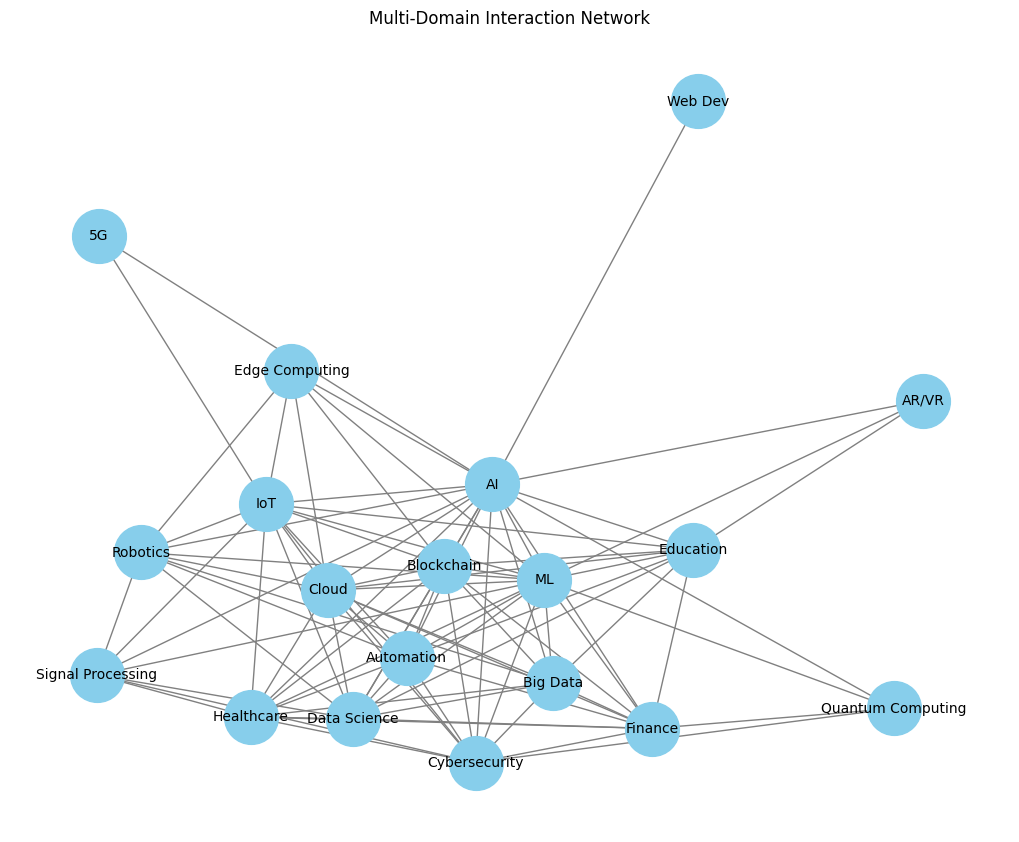

In [ ]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=10)
plt.title("Multi-Domain Interaction Network")
plt.show()


Step 8-Community Detection

In [ ]:
partition = community_louvain.best_partition(G)
print(partition)

{'AI': 1, 'ML': 1, 'Data Science': 2, 'Robotics': 1, 'Cloud': 2, 'IoT': 1, 'Cybersecurity': 0, 'Blockchain': 2, 'Finance': 2, 'Healthcare': 2, 'Education': 2, 'Signal Processing': 1, 'Web Dev': 1, 'Big Data': 2, 'Automation': 2, 'Quantum Computing': 0, 'Edge Computing': 1, 'AR/VR': 1, '5G': 1}


Step 9-Visualizing


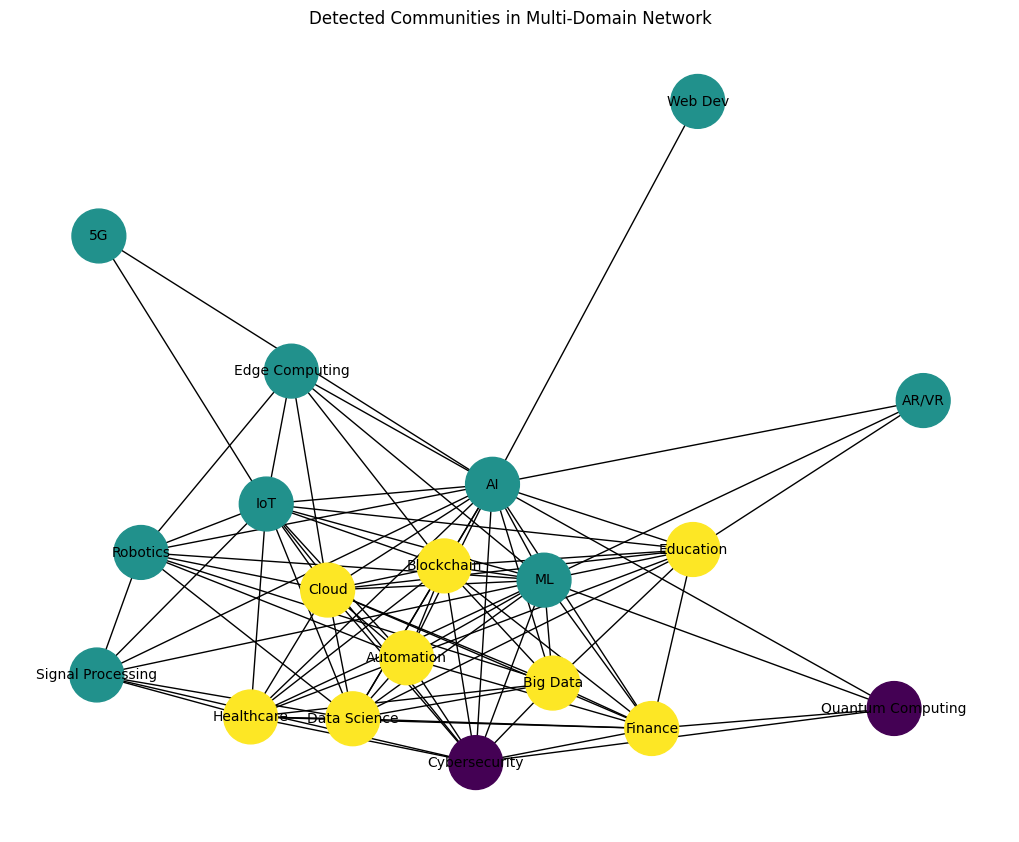

In [ ]:

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
cmap = plt.get_cmap('viridis')
nx.draw(G, pos, node_color=[partition[node] for node in G.nodes()],
        with_labels=True, cmap=cmap, node_size=1500, font_size=10)
plt.title("Detected Communities in Multi-Domain Network")
plt.show()


Step 10-Analyze Result

In [ ]:
from collections import defaultdict

communities = defaultdict(list)
for domain, comm_id in partition.items():
    communities[comm_id].append(domain)

for comm_id, nodes in communities.items():
    print(f"Community {comm_id+1}: {nodes}")


Community 2: ['AI', 'ML', 'Robotics', 'IoT', 'Signal Processing', 'Web Dev', 'Edge Computing', 'AR/VR', '5G']
Community 3: ['Data Science', 'Cloud', 'Blockchain', 'Finance', 'Healthcare', 'Education', 'Big Data', 'Automation']
Community 1: ['Cybersecurity', 'Quantum Computing']
